What vaccines are used and in which countries?
What country is vaccinated more people?
What country is vaccinated a larger percent from its population?
Combine vaccination data with UN Data and try to capture what influences vaccination programmes, and these programmes success.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
UN_data = pd.read_csv("country_profile_variables.csv")

In [3]:
UN_data.head()

country          Region Surface area (km2)  \
0     Afghanistan    SouthernAsia             652864   
1         Albania  SouthernEurope              28748   
2         Algeria  NorthernAfrica            2381741   
3  American Samoa       Polynesia                199   
4         Andorra  SouthernEurope                468   

   Population in thousands (2017)  Population density (per km2, 2017)  \
0                           35530                                54.4   
1                            2930                               106.9   
2                           41318                                17.3   
3                              56                               278.2   
4                              77                               163.8   

   Sex ratio (m per 100 f, 2017)  \
0                          106.3   
1                          101.9   
2                          102.0   
3                          103.6   
4                          102.3   

   GDP: Gross domestic product (million current US$)  \
0                                              20270   
1                                              11541   
2                                             164779   
3                                                -99   
4                                               2812   

  GDP growth rate (annual %, const. 2005 prices)  \
0                                           -2.4   
1                                            2.6   
2                                            3.8   
3                                            -99   
4                                            0.8   

   GDP per capita (current US$) Economy: Agriculture (% of GVA)  ...  \
0                         623.2                            23.3  ...   
1                        3984.2                            22.4  ...   
2                        4154.1                            12.2  ...   
3                         -99.0                             -99  ...   
4                       39896.4                             0.5  ...   

   Mobile-cellular subscriptions (per 100 inhabitants).1  \
0                                                8.3       
1                                               63.3       
2                                               38.2       
3                                                -99       
4                                               96.9       

   Individuals using the Internet (per 100 inhabitants)  \
0                                                 42      
1                                                130      
2                                                135      
3                                                 92      
4                                                 13      

  Threatened species (number) Forested area (% of land area)  \
0                         2.1                        9.8/0.3   
1                        28.2                        5.7/2.0   
2                         0.8                      145.4/3.7   
3                        87.9                            -99   
4                        34.0                        0.5/6.4   

  CO2 emission estimates (million tons/tons per capita)  \
0                                                 63      
1                                                 84      
2                                               5900      
3                                                -99      
4                                                  1      

  Energy production, primary (Petajoules)  \
0                                       5   
1                                      36   
2                                      55   
3                                     -99   
4                                     119   

  Energy supply per capita (Gigajoules)  \
0                             78.2/47.0   
1                             94.9/95.2   
2                             84.3/81.8   
3                           100.0/1

In [4]:
UN_data['country'].nunique()

229

In [5]:
UN_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     229 non-null    object 
 1   Region                                                      229 non-null    object 
 2   Surface area (km2)                                          229 non-null    object 
 3   Population in thousands (2017)                              229 non-null    int64  
 4   Population density (per km2, 2017)                          229 non-null    float64
 5   Sex ratio (m per 100 f, 2017)                               229 non-null    float64
 6   GDP: Gross domestic product (million current US$)           229 non-null    int64  
 7   GDP growth rate (annual %, const. 2005 prices)              229 non-null    object 
 8   

In [6]:
country_vaccine = pd.read_csv("country_vaccinations.csv")

In [7]:
country_vaccine.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0    Algeria      DZA  2021-01-29                 0.0                NaN   
1    Algeria      DZA  2021-01-30                30.0                NaN   
2  Argentina      ARG  2020-12-29               700.0                NaN   
3  Argentina      ARG  2020-12-30                 NaN                NaN   
4  Argentina      ARG  2020-12-31             32013.0                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                    30.0                30.0   
2                      NaN                     NaN                 NaN   
3                      NaN                     NaN             15656.0   
4                      NaN                     NaN             15656.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.00                            NaN   
1                            0.00                            NaN   
2                            0.00                            NaN   
3                             NaN                            NaN   
4                            0.07                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                             1.0   
2                                  NaN                             NaN   
3                                  NaN                           346.0   
4                                  NaN                           346.0   

    vaccines         source_name  \
0  Sputnik V  Ministry of Health   
1  Sputnik V  Ministry of Health   
2  Sputnik V  Ministry of Health   
3  Sputnik V  Ministry of Health   
4  Sputnik V  Ministry of Health   

                                      source_website  
0  https://www.aps.dz/regions/116777-blida-covid-...  
1  https://www.aps.dz/regions/116777-blida-covid-...  
2  http://datos.salud.gob.ar/dataset/vacunas-cont...  
3  http://datos.salud.gob.ar/dataset/vacunas-cont...  
4  http://datos.salud.gob.ar/dataset/vacunas-cont...

In [8]:
country_vaccine['date']=pd.to_datetime(country_vaccine['date'])

In [9]:
country_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934 entries, 0 to 1933
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              1934 non-null   object        
 1   iso_code                             1732 non-null   object        
 2   date                                 1934 non-null   datetime64[ns]
 3   total_vaccinations                   1278 non-null   float64       
 4   people_vaccinated                    1004 non-null   float64       
 5   people_fully_vaccinated              521 non-null    float64       
 6   daily_vaccinations_raw               1045 non-null   float64       
 7   daily_vaccinations                   1863 non-null   float64       
 8   total_vaccinations_per_hundred       1278 non-null   float64       
 9   people_vaccinated_per_hundred        1004 non-null   float64       
 10  people_fully

In [10]:
country_vaccine_1 = country_vaccine.set_index('date')

In [11]:
import plotly.express as px
fig_date = px.line(country_vaccine_1, y="people_vaccinated", color='country')
fig_date.show()

In [12]:
import plotly.express as px
fig_date_1 = px.line(country_vaccine_1, y="people_vaccinated_per_hundred", color='country')
fig_date_1.show()

In [13]:
country_vaccine_date = country_vaccine.groupby(['date']).sum()

In [14]:
country_vaccine_date.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51 entries, 2020-12-13 to 2021-02-01
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_vaccinations                   51 non-null     float64
 1   people_vaccinated                    51 non-null     float64
 2   people_fully_vaccinated              51 non-null     float64
 3   daily_vaccinations_raw               51 non-null     float64
 4   daily_vaccinations                   51 non-null     float64
 5   total_vaccinations_per_hundred       51 non-null     float64
 6   people_vaccinated_per_hundred        51 non-null     float64
 7   people_fully_vaccinated_per_hundred  51 non-null     float64
 8   daily_vaccinations_per_million       51 non-null     float64
dtypes: float64(9)
memory usage: 4.0 KB


In [15]:
country_vaccine_date.tail()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
date                                                                         
2021-01-28          69121215.0         54562752.0                8753508.0   
2021-01-29          72916331.0         56823361.0                9384467.0   
2021-01-30          76730617.0         59619641.0               10153371.0   
2021-01-31         100686676.0         59658340.0               10605110.0   
2021-02-01          12219216.0          7290013.0                1038621.0   

            daily_vaccinations_raw  daily_vaccinations  \
date                                                     
2021-01-28               4460435.0           4456115.0   
2021-01-29               4524768.0           4440424.0   
2021-01-30               4174991.0           4411446.0   
2021-01-31               2922907.0           4221879.0   
2021-02-01                336434.0            594330.0   

            total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
date                                                                        
2021-01-28                          303.71                         226.27   
2021-01-29                          322.86                         234.20   
2021-01-30                          289.44                         236.73   
2021-01-31                          292.31                         242.74   
2021-02-01                           84.38                          50.85   

            people_fully_vaccinated_per_hundred  \
date                                              
2021-01-28                                35.01   
2021-01-29                                37.59   
2021-01-30                                38.54   
2021-01-31                                41.76   
2021-02-01                                 6.55   

            daily_vaccinations_per_million  
date                                        
2021-01-28                        154489.0  
2021-01-29                        155242.0  
2021-01-30                        128778.0  
2021-01-31                        122090.0  
2021-02-01                         34436.0

In [16]:
import plotly.express as px
fig_date = px.line(country_vaccine_date, y="people_vaccinated")
fig_date.show()

The number of people vaccinated increases slowly with the time initially and then suddenly shoot up in January with a steep downfall at Feb-01.

In [17]:
country_vaccine =country_vaccine.groupby(['country', 'vaccines', 'iso_code']).sum()

In [18]:
country_vaccine = country_vaccine.reset_index()

In [19]:
CV_UNdata = pd.merge(country_vaccine, UN_data, how = 'left', on = 'country')

In [20]:
CV_UNdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 61 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     62 non-null     object 
 1   vaccines                                                    62 non-null     object 
 2   iso_code                                                    62 non-null     object 
 3   total_vaccinations                                          62 non-null     float64
 4   people_vaccinated                                           62 non-null     float64
 5   people_fully_vaccinated                                     62 non-null     float64
 6   daily_vaccinations_raw                                      62 non-null     float64
 7   daily_vaccinations                                          62 non-null     float64
 8   to

In [21]:
CV_UNdata

country                             vaccines iso_code  \
0                Algeria                            Sputnik V      DZA   
1              Argentina                            Sputnik V      ARG   
2                Austria                      Pfizer/BioNTech      AUT   
3                Bahrain           Pfizer/BioNTech, Sinopharm      BHR   
4                Belgium             Moderna, Pfizer/BioNTech      BEL   
..                   ...                                  ...      ...   
57           Switzerland             Moderna, Pfizer/BioNTech      CHE   
58                Turkey                              Sinovac      TUR   
59  United Arab Emirates           Pfizer/BioNTech, Sinopharm      ARE   
60        United Kingdom  Oxford/AstraZeneca, Pfizer/BioNTech      GBR   
61         United States             Moderna, Pfizer/BioNTech      USA   

    total_vaccinations  people_vaccinated  people_fully_vaccinated  \
0                 30.0                0.0                      0.0   
1            4251359.0          3183292.0                 520621.0   
2            2358998.0          2269175.0                  89823.0   
3            3418151.0          3418151.0                      0.0   
4            3941324.0          3867539.0                  73785.0   
..                 ...                ...                      ...   
57            805232.0                0.0                      0.0   
58          23853932.0                0.0                      0.0   
59          54949833.0         45523930.0                5750000.0   
60         132171075.0        122062847.0               10108228.0   
61         389586952.0        327905468.0               49123911.0   

    daily_vaccinations_raw  daily_vaccinations  \
0                     30.0                30.0   
1                 118451.0            381214.0   
2                 195561.0            187577.0   
3                 110780.0            148162.0   
4                 296662.0            275568.0   
..                     ...                 ...   
57                     0.0            232788.0   
58               2136299.0           2540614.0   
59               2553080.0           2317170.0   
60               7112605.0           7956920.0   
61              20890449.0          26376556.0   

    total_vaccinations_per_hundred  people_vaccinated_per_hundred  ...  \
0                             0.00                           0.00  ...   
1                             9.42                           7.04  ...   
2                            26.22                          25.21  ...   
3                           200.89                         200.89  ...   
4                            34.00                          33.37  ...   
..                             ...                            ...  ...   
57                            9.30                           0.00  ...   
58                           28.29                           0.00  ...   
59                          555.59                         460.28  ...   
60                          194.70                         179.78  ...   
61                          117.70                          99.08  ...   

    Mobile-cellular subscriptions (per 100 inhabitants).1  \
0                                                38.2       
1                                                69.4       
2                                                83.9       
3                                                93.5       
4                                                85.1       
..                                                ...       
57                                               88.0       
58                                               53.7       
59                                               91.2       
60                                               92.0       
61                                                NaN       

    Individuals using the Internet (per 100 inhabitants)  \
0   

In [22]:
CV_UNdata['people_vaccinated_per_hundred'].max()

821.3900000000001

In [23]:
CV_UNdata['people_vaccinated_per_hundred'].isnull().sum()

0

In [24]:
country_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              62 non-null     object 
 1   vaccines                             62 non-null     object 
 2   iso_code                             62 non-null     object 
 3   total_vaccinations                   62 non-null     float64
 4   people_vaccinated                    62 non-null     float64
 5   people_fully_vaccinated              62 non-null     float64
 6   daily_vaccinations_raw               62 non-null     float64
 7   daily_vaccinations                   62 non-null     float64
 8   total_vaccinations_per_hundred       62 non-null     float64
 9   people_vaccinated_per_hundred        62 non-null     float64
 10  people_fully_vaccinated_per_hundred  62 non-null     float64
 11  daily_vaccinations_per_million    

Task 1 - What vaccines are used and in which countries? What country is vaccinated more people?

In [25]:
unique_vaccines = country_vaccine.vaccines

In [26]:
unique_vaccines.unique()

array(['Sputnik V', 'Pfizer/BioNTech', 'Pfizer/BioNTech, Sinopharm',
       'Moderna, Pfizer/BioNTech', 'Oxford/AstraZeneca, Sinovac',
       'CNBG, Sinovac', 'Covaxin, Oxford/AstraZeneca', 'Sinovac',
       'Oxford/AstraZeneca, Sinopharm', 'Oxford/AstraZeneca', 'Moderna',
       'Pfizer/BioNTech, Sinopharm, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech'], dtype=object)

In [27]:
unique_countries = country_vaccine.country

In [28]:
unique_countries.unique()

array(['Algeria', 'Argentina', 'Austria', 'Bahrain', 'Belgium', 'Bermuda',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Estonia',
       'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Mexico', 'Morocco', 'Myanmar', 'Netherlands', 'Norway',
       'Oman', 'Palau', 'Panama', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Turkey', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [29]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(CV_UNdata, locations="iso_code", color="country",
                     hover_name="country",size = "people_vaccinated",
                     text = "vaccines",
                     projection="natural earth")
fig.show()

In [30]:
df_full_vaccinated = px.data.gapminder()
fig_fully_vaccinated = px.scatter_geo(CV_UNdata, locations="iso_code", color="country",
                     hover_name="country",size = "people_fully_vaccinated",size_max=40,
                     text = "vaccines",
                     projection="natural earth")
fig_fully_vaccinated.show()

Interpretation_1 - USA has maximum number of people partially and fully vaccinated. You can hover over the countries to know which vaccines are used in the respective countries.

In [31]:
CV_UNdata.head()

country                    vaccines iso_code  total_vaccinations  \
0    Algeria                   Sputnik V      DZA                30.0   
1  Argentina                   Sputnik V      ARG           4251359.0   
2    Austria             Pfizer/BioNTech      AUT           2358998.0   
3    Bahrain  Pfizer/BioNTech, Sinopharm      BHR           3418151.0   
4    Belgium    Moderna, Pfizer/BioNTech      BEL           3941324.0   

   people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                0.0                      0.0                    30.0   
1          3183292.0                 520621.0                118451.0   
2          2269175.0                  89823.0                195561.0   
3          3418151.0                      0.0                110780.0   
4          3867539.0                  73785.0                296662.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
0                30.0                            0.00   
1            381214.0                            9.42   
2            187577.0                           26.22   
3            148162.0                          200.89   
4            275568.0                           34.00   

   people_vaccinated_per_hundred  ...  \
0                           0.00  ...   
1                           7.04  ...   
2                          25.21  ...   
3                         200.89  ...   
4                          33.37  ...   

   Mobile-cellular subscriptions (per 100 inhabitants).1  \
0                                               38.2       
1                                               69.4       
2                                               83.9       
3                                               93.5       
4                                               85.1       

   Individuals using the Internet (per 100 inhabitants)  \
0                                              135.0      
1                                              256.0      
2                                              118.0      
3                                               36.0      
4                                               37.0      

  Threatened species (number) Forested area (% of land area)  \
0                         0.8                      145.4/3.7   
1                        10.0                      204.0/4.7   
2                        46.9                       58.7/6.9   
3                         0.8                      31.3/23.0   
4                        22.6                       93.4/8.3   

   CO2 emission estimates (million tons/tons per capita)  \
0                                             5900.0       
1                                             3167.0       
2                                              505.0       
3                                              961.0       
4                                              520.0       

   Energy production, primary (Petajoules)  \
0                                     55.0   
1                                     85.0   
2                                    158.0   
3                                    413.0   
4                                    196.0   

   Energy supply per capita (Gigajoules)  \
0                              84.3/81.8   
1                             99.0/100.0   
2                            100.0/100.0   
3                            100.0/100.0   
4                            100.0/100.0   

   Pop. using improved drinking water (urban/rural, %)  \
0                                          89.8/82.2     
1                                          96.2/98.3     
2                                        100.0/100.0     
3                                          99.2/99.2     
4                                          99.5/99.4     

  Pop. using improved sanitation facilities (urban/rural, %)  \
0                                               0.05           
1                                               0.01    

In [32]:
CV_UNdata_vaccines = CV_UNdata.groupby(['vaccines']).sum()

In [33]:
CV_UNdata_vaccines.head()

total_vaccinations  people_vaccinated  \
vaccines                                                             
CNBG, Sinovac                        86767000.0                0.0   
Covaxin, Oxford/AstraZeneca          28323206.0                0.0   
Moderna                                  3109.0                0.0   
Moderna, Pfizer/BioNTech            558100601.0        462791905.0   
Oxford/AstraZeneca                     106065.0                0.0   

                             people_fully_vaccinated  daily_vaccinations_raw  \
vaccines                                                                       
CNBG, Sinovac                                    0.0                     0.0   
Covaxin, Oxford/AstraZeneca                      0.0               3758843.0   
Moderna                                          0.0                     0.0   
Moderna, Pfizer/BioNTech                  72946041.0              30735724.0   
Oxford/AstraZeneca                               0.0                 62954.0   

                             daily_vaccinations  \
vaccines                                          
CNBG, Sinovac                        21794325.0   
Covaxin, Oxford/AstraZeneca           3379485.0   
Moderna                                  3120.0   
Moderna, Pfizer/BioNTech             36552455.0   
Oxford/AstraZeneca                      47716.0   

                             total_vaccinations_per_hundred  \
vaccines                                                      
CNBG, Sinovac                                          6.02   
Covaxin, Oxford/AstraZeneca                            2.05   
Moderna                                               17.18   
Moderna, Pfizer/BioNTech                            1492.18   
Oxford/AstraZeneca                                     0.49   

                             people_vaccinated_per_hundred  \
vaccines                                                     
CNBG, Sinovac                                         0.00   
Covaxin, Oxford/AstraZeneca                           0.00   
Moderna                                               0.00   
Moderna, Pfizer/BioNTech                           1203.37   
Oxford/AstraZeneca                                    0.00   

                             people_fully_vaccinated_per_hundred  \
vaccines                                                           
CNBG, Sinovac                                               0.00   
Covaxin, Oxford/AstraZeneca                                 0.00   
Moderna                                                     0.00   
Moderna, Pfizer/BioNTech                                  248.97   
Oxford/AstraZeneca                                          0.00   

                             daily_vaccinations_per_million  \
vaccines                                                      
CNBG, Sinovac                                       15134.0   
Covaxin, Oxford/AstraZeneca                          2449.0   
Moderna                                            172440.0   
Moderna, Pfizer/BioNTech                           866473.0   
Oxford/AstraZeneca                                   2121.0   

                             Population in thousands (2017)  ...  \
vaccines                                                     ...   
CNBG, Sinovac                                     1409517.0  ...   
Covaxin, Oxford/AstraZeneca                       1339180.0  ...   
Moderna                                                22.0  ...   
Moderna, Pfizer/BioNTech                           237017.0  ...   
Oxford/AstraZeneca                                  74248.0  ...   

                             Economy: Services and other activity (% of GVA)  \
vaccines                                                                       
CNBG, Sinovac                                                           49.7   
Covaxin, Oxford/AstraZeneca                                             53.2   
Moderna                   

<AxesSubplot:ylabel='vaccines'>

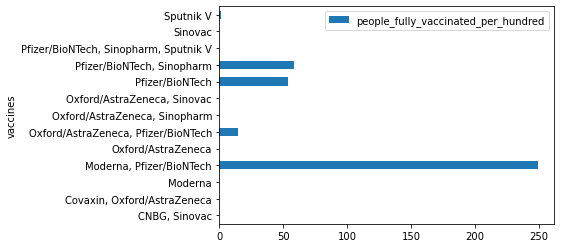

In [34]:
CV_UNdata_vaccines.plot.barh(y='people_fully_vaccinated_per_hundred')

It is Moderna, Pfizer/BioNtech vaccine that vaccined maximum percentage of people.

Task 2- What country is vaccinated a larger percent from its population?

In [35]:
import plotly.express as px
df_1 = px.data.gapminder()
fig_1 = px.scatter_geo(CV_UNdata, locations="iso_code", color="country",
                     hover_name="country",size = "people_vaccinated_per_hundred",
                     text = "vaccines",
                     projection="natural earth")
fig_1.show()

In [36]:
df_2 = px.data.gapminder()
fig_2 = px.scatter_geo(CV_UNdata, locations="iso_code", color="country",
                     hover_name="country",size = "people_fully_vaccinated_per_hundred",
                     text = "vaccines",
                     projection="natural earth")
fig_2.show()

Interpretation_2: Israel seems to have maximum percentage of people partially and fully vaccinated.

Capture what influences vaccination programmes, and these programmes success.

In [37]:
CV_UNdata_gdp = px.data.gapminder()

fig = px.scatter(CV_UNdata, x="GDP per capita (current US$)", y="country",
                 size="people_vaccinated_per_hundred", color="country",
                 hover_name="country", size_max=80)
fig.show()

It can be observed from the plot that even though the GDP per capita of israel is less than that of UAE and UK, the people vaccinated per hundred is highest.
Similarly if we compare UAE and UK, the GDP per capita is higher for UK, however people vaccinated per hundred is less than that of UAE.
Gibraltar has GDP per capita in negative, however it is second in number for people vaccinated per hundred.
From this, we can infer that GDP per capita do not influence the data of people vaccinated.

In [38]:
CV_UNdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 61 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     62 non-null     object 
 1   vaccines                                                    62 non-null     object 
 2   iso_code                                                    62 non-null     object 
 3   total_vaccinations                                          62 non-null     float64
 4   people_vaccinated                                           62 non-null     float64
 5   people_fully_vaccinated                                     62 non-null     float64
 6   daily_vaccinations_raw                                      62 non-null     float64
 7   daily_vaccinations                                          62 non-null     float64
 8   to

In [39]:
CV_UNdata['Economy: Agriculture (% of GVA)'] = CV_UNdata['Economy: Agriculture (% of GVA)'].str.replace('~', '')
CV_UNdata['Economy: Agriculture (% of GVA)']=CV_UNdata['Economy: Agriculture (% of GVA)'].astype(float)

In [40]:
economy = px.scatter(CV_UNdata, x="country", y='Economy: Agriculture (% of GVA)',
                 size="people_vaccinated_per_hundred", color="country",
                 hover_name="country", size_max=80)
economy.show()

In [41]:
health_exp = px.scatter(CV_UNdata, x="country", y='Health: Total expenditure (% of GDP)',
                 size="people_vaccinated_per_hundred", color="country",
                 hover_name="country", size_max=80)
health_exp.show()

In [42]:
employment_agri_exp = px.scatter(CV_UNdata, x="country", y='Employment: Agriculture (% of employed)',
                 size="people_vaccinated_per_hundred", color="country",
                 hover_name="country", size_max=80)
employment_agri_exp.show()

In [43]:
unemployment_agri_exp = px.scatter(CV_UNdata, x="country", y='Unemployment (% of labour force)',
                 size="people_vaccinated_per_hundred", color="country",
                 hover_name="country", size_max=80)
unemployment_agri_exp.show()

In [44]:
hygiene_exp = px.scatter(CV_UNdata, x="country", y='Pop. using improved sanitation facilities (urban/rural, %)',
                 size="people_vaccinated_per_hundred",color = 'country',
                 hover_name="country", size_max=80)
hygiene_exp.show()

It is observed from the plots that there is no relationship between the countries economy, education, hygience factility with the people vaccinated. It is still the Israel that is showing highest people_vaccinated_per_hundred irrespective of its economy, hygiene, education etc.

In [45]:
import seaborn as sns

In [46]:
CV_UNdata[['GDP growth rate (annual %, const. 2005 prices)', 'Economy: Agriculture (% of GVA)',
'Employment: Agriculture (% of employed)', 'Employment: Industry (% of employed)','Employment: Services (% of employed)',
'Unemployment (% of labour force)', 'Labour force participation (female/male pop. %)','International trade: Exports (million US$)',
'Labour force participation (female/male pop. %)','International trade: Exports (million US$)','International trade: Imports (million US$)',
'International trade: Balance (million US$)', 'Balance of payments, current account (million US$)','Population growth rate (average annual %)',
'Urban population growth rate (average annual %)', 'Fertility rate, total (live births per woman)', 'Life expectancy at birth (females/males, years)']] = CV_UNdata[['GDP growth rate (annual %, const. 2005 prices)', 'Economy: Agriculture (% of GVA)',
'Employment: Agriculture (% of employed)', 'Employment: Industry (% of employed)','Employment: Services (% of employed)','Unemployment (% of labour force)', 'Labour force participation (female/male pop. %)','International trade: Exports (million US$)','Labour force participation (female/male pop. %)','International trade: Exports (million US$)','International trade: Imports (million US$)',
'International trade: Balance (million US$)', 'Balance of payments, current account (million US$)','Population growth rate (average annual %)',
'Urban population growth rate (average annual %)', 'Fertility rate, total (live births per woman)', 'Life expectancy at birth (females/males, years)']].apply(pd.to_numeric, errors='coerce')

In [47]:
CV_UNdata[['Population age distribution (0-14 / 60+ years, %)', 'International migrant stock (000/% of total pop.)','Refugees and others of concern to UNHCR (in thousands)',
          'Infant mortality rate (per 1000 live births', 'Health: Physicians (per 1000 pop.)',
          'Education: Government expenditure (% of GDP)', 'Education: Primary gross enrol. ratio (f/m per 100 pop.)',
          'Education: Secondary gross enrol. ratio (f/m per 100 pop.)','Education: Tertiary gross enrol. ratio (f/m per 100 pop.)',
          'Mobile-cellular subscriptions (per 100 inhabitants)','Mobile-cellular subscriptions (per 100 inhabitants).1',
          'Threatened species (number)', 'Forested area (% of land area)', 'Energy supply per capita (Gigajoules)',
          'Pop. using improved drinking water (urban/rural, %)', 'Pop. using improved sanitation facilities (urban/rural, %)']] = CV_UNdata[['Population age distribution (0-14 / 60+ years, %)', 'International migrant stock (000/% of total pop.)','Refugees and others of concern to UNHCR (in thousands)',
          'Infant mortality rate (per 1000 live births', 'Health: Physicians (per 1000 pop.)',
          'Education: Government expenditure (% of GDP)', 'Education: Primary gross enrol. ratio (f/m per 100 pop.)',
          'Education: Secondary gross enrol. ratio (f/m per 100 pop.)','Education: Tertiary gross enrol. ratio (f/m per 100 pop.)',
          'Mobile-cellular subscriptions (per 100 inhabitants)','Mobile-cellular subscriptions (per 100 inhabitants).1',
          'Threatened species (number)', 'Forested area (% of land area)', 'Energy supply per capita (Gigajoules)',
          'Pop. using improved drinking water (urban/rural, %)', 'Pop. using improved sanitation facilities (urban/rural, %)']].apply(pd.to_numeric,errors = 'coerce' )

In [48]:
CV_UNdata['Surface area (km2)'] = pd.to_numeric(CV_UNdata['Surface area (km2)'], errors = 'coerce')

In [49]:
CV_UNdata_1 = CV_UNdata.drop(labels = ['Labour force participation (female/male pop. %)','Life expectancy at birth (females/males, years)',
                                      'Population age distribution (0-14 / 60+ years, %)','International migrant stock (000/% of total pop.)',
                                      'Education: Primary gross enrol. ratio (f/m per 100 pop.)', 'Education: Secondary gross enrol. ratio (f/m per 100 pop.)', 
                                      'Education: Tertiary gross enrol. ratio (f/m per 100 pop.)', 'Forested area (% of land area)','Energy supply per capita (Gigajoules)',
                                      'Pop. using improved drinking water (urban/rural, %)'], axis=1)

In [50]:
CV_UNdata_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     62 non-null     object 
 1   vaccines                                                    62 non-null     object 
 2   iso_code                                                    62 non-null     object 
 3   total_vaccinations                                          62 non-null     float64
 4   people_vaccinated                                           62 non-null     float64
 5   people_fully_vaccinated                                     62 non-null     float64
 6   daily_vaccinations_raw                                      62 non-null     float64
 7   daily_vaccinations                                          62 non-null     float64
 8   to

In [51]:
CV_UNdata_heatmap_df = CV_UNdata_1.drop(labels= ['country','vaccines','iso_code','Region'], axis = 1)

In [52]:
CV_UNdata_heatmap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 47 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   total_vaccinations                                          62 non-null     float64
 1   people_vaccinated                                           62 non-null     float64
 2   people_fully_vaccinated                                     62 non-null     float64
 3   daily_vaccinations_raw                                      62 non-null     float64
 4   daily_vaccinations                                          62 non-null     float64
 5   total_vaccinations_per_hundred                              62 non-null     float64
 6   people_vaccinated_per_hundred                               62 non-null     float64
 7   people_fully_vaccinated_per_hundred                         62 non-null     float64
 8   da

In [53]:
import seaborn as sns

<AxesSubplot:>

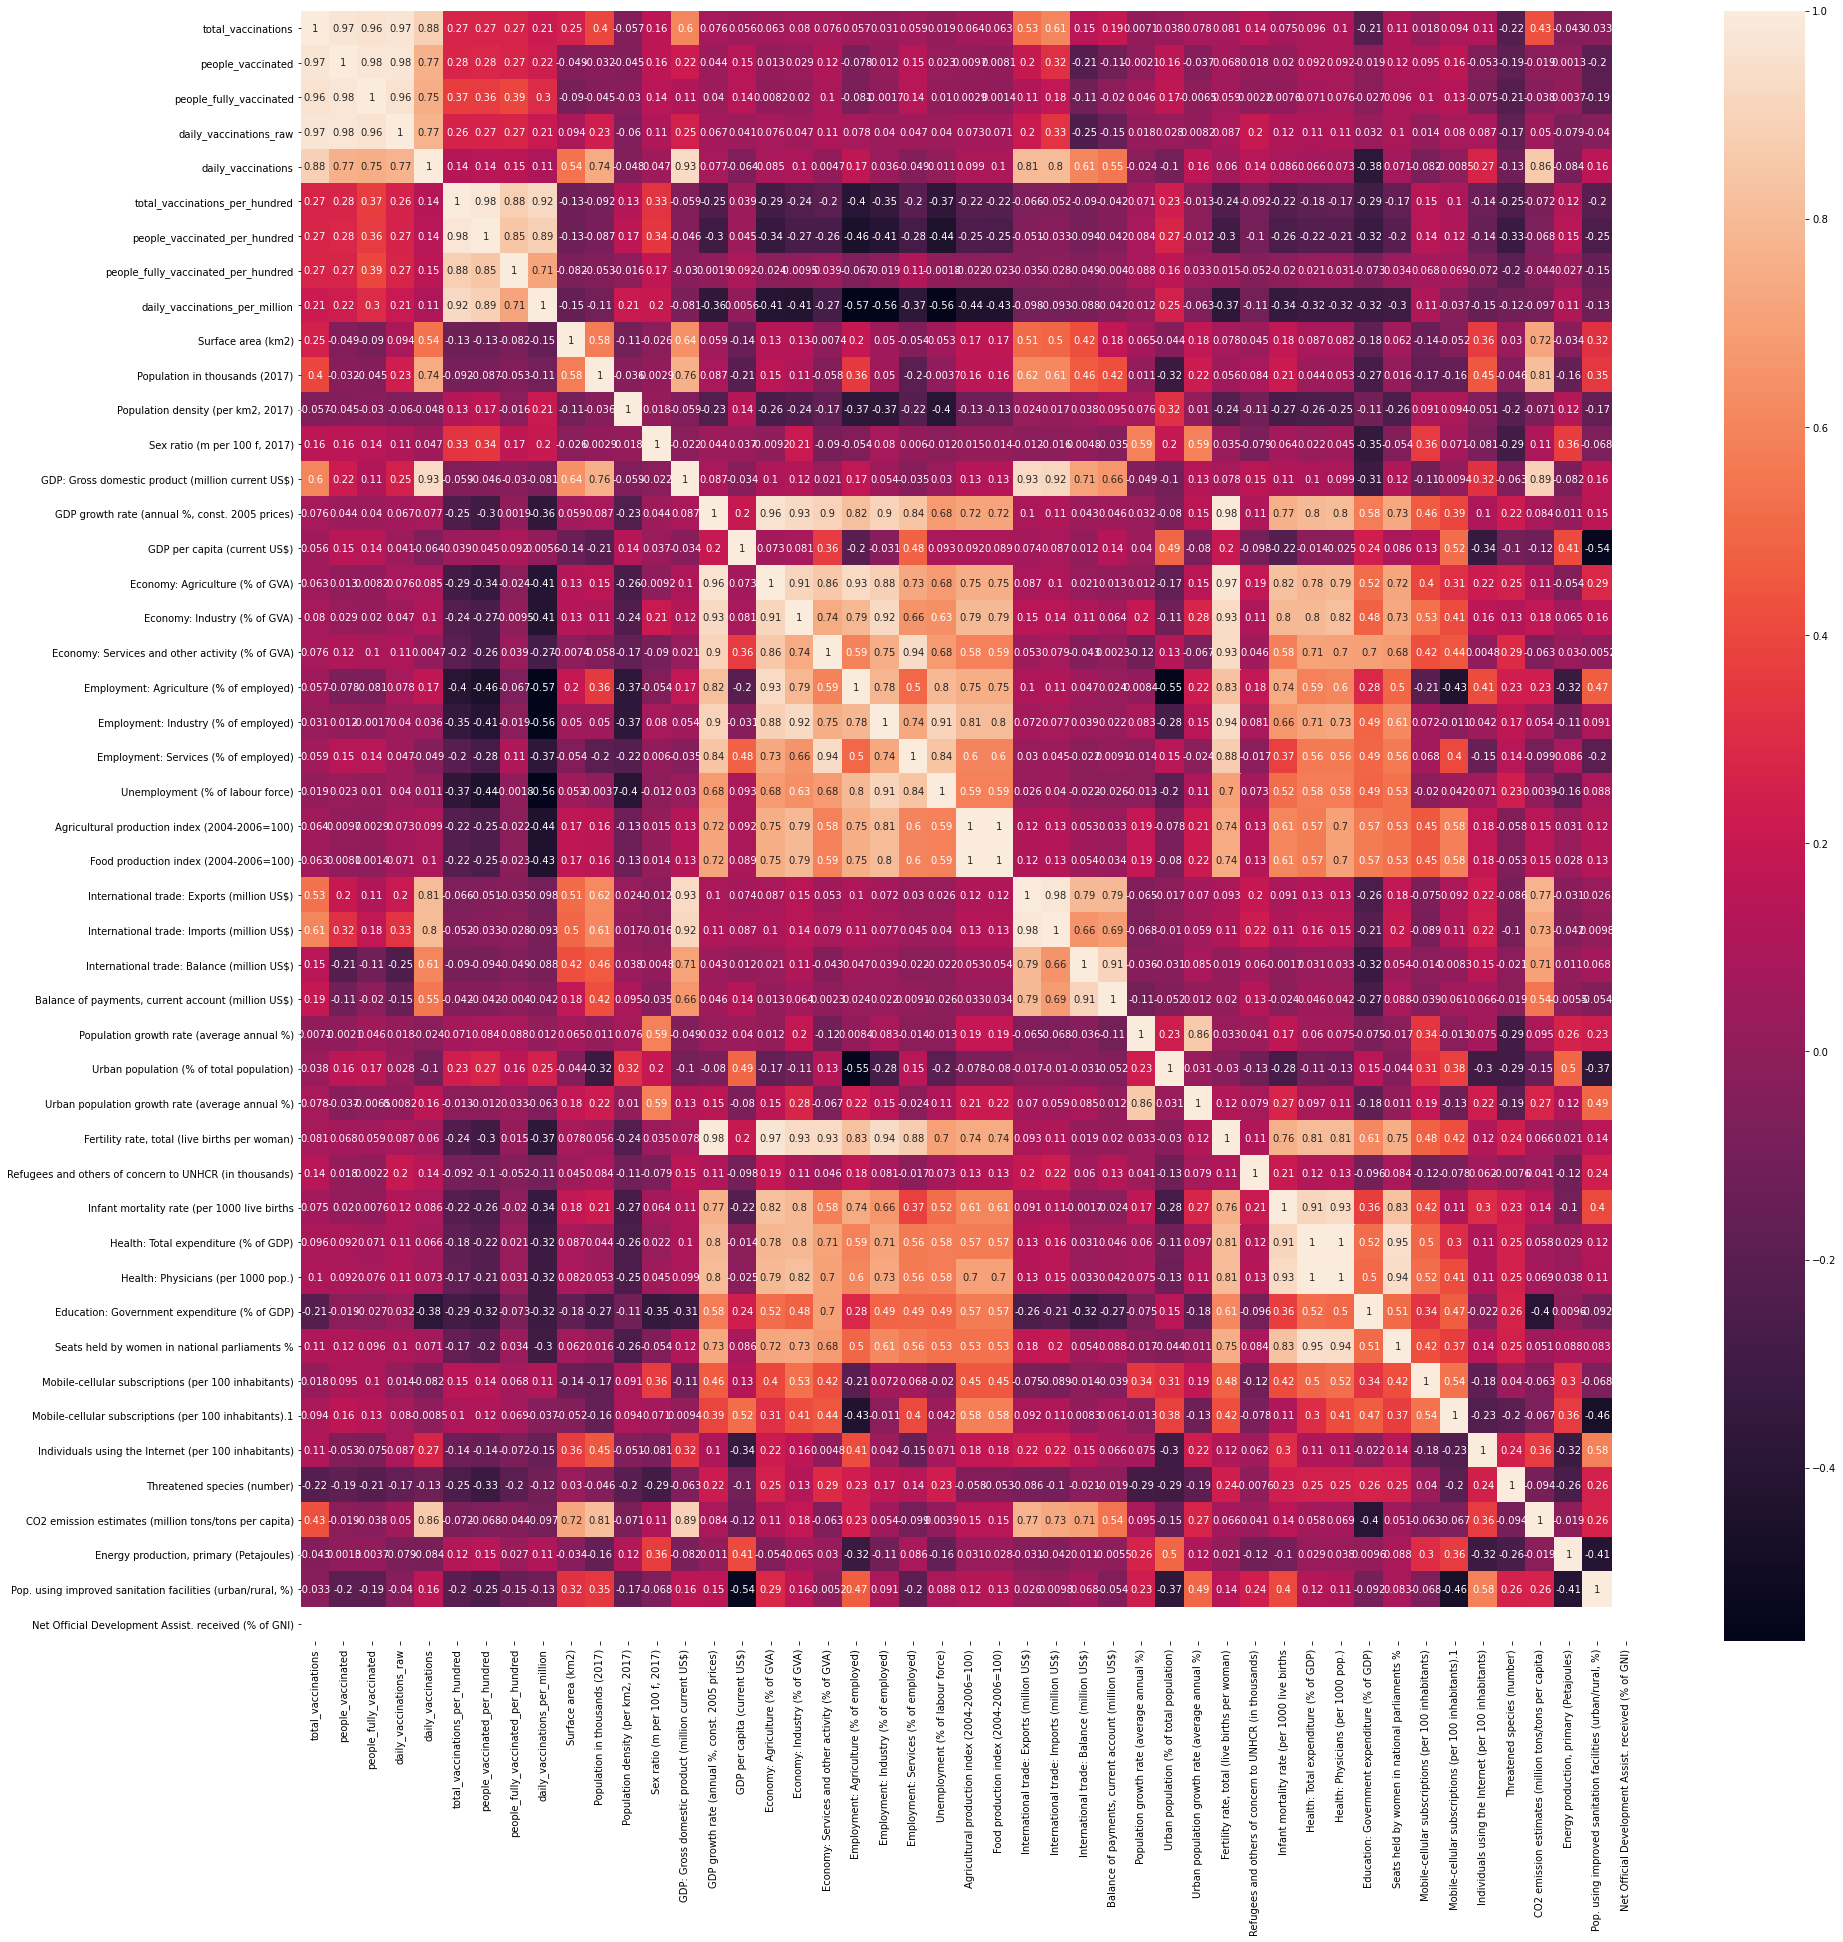

In [54]:
corr = CV_UNdata_heatmap_df.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot = True)

From the heat map, it can be observed people vaccinated per hundred have good correlation only with total vaccination per hundred, daily vaccination per million and people fully vaccinated per hundred

In [55]:
from pycaret.regression import *

In [56]:
CV_UNdata_df = CV_UNdata_1.drop(labels= ['country','iso_code','Region'], axis = 1)

In [86]:
reg_experiment = setup(CV_UNdata_df, 
                       target = 'people_vaccinated', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='peoplevaccinated', remove_multicollinearity = True,
                      multicollinearity_threshold = 0.8, numeric_imputation = 'median', ignore_low_variance = True,
                      feature_selection=True, feature_interaction=True)

In [87]:
reg_experiment 

(-1,
 {'parameter': 'Hyperparameters',
  'residuals': 'Residuals',
  'error': 'Prediction Error',
  'cooks': 'Cooks Distance',
  'rfe': 'Feature Selection',
  'learning': 'Learning Curve',
  'manifold': 'Manifold Learning',
  'vc': 'Validation Curve',
  'feature': 'Feature Importance',
  'feature_all': 'Feature Importance (All)',
  'tree': 'Decision Tree',
  'residuals_interactive': 'Interactive Residuals'},
 24       31735.0
 39           0.0
 15     4503079.0
 31           0.0
 43           0.0
 54    14567742.0
 18      889111.0
 40     1566791.0
 57           0.0
 13       34939.0
 26     1748608.0
 27      298200.0
 56      763811.0
 23     2265718.0
 11       99768.0
 0            0.0
 5            0.0
 10           0.0
 30    29926492.0
 Name: people_vaccinated, dtype: float32,
 Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
          

In [88]:
get_config('X')

Individuals using the Internet (per 100 inhabitants)  \
0                                               135.0      
1                                               256.0      
2                                               118.0      
3                                                36.0      
4                                                37.0      
..                                                ...      
57                                               74.0      
58                                              388.0      
59                                               56.0      
60                                              102.0      
61                                              122.0      

    Sex ratio (m per 100 f 2017)  Surface area (km2)  \
0                     102.000000           2381741.0   
1                      95.900002           2780400.0   
2                      96.199997             83871.0   
3                     168.300003               771.0   
4                      97.300003             30528.0   
..                           ...                 ...   
57                     98.199997             41291.0   
58                     97.000000            783562.0   
59                    262.399994             83600.0   
60                     97.400002            242495.0   
61                     97.199997             88499.0   

    Urban population (% of total population)  \
0                                  70.699997   
1                                  91.800003   
2                                  66.000000   
3                                  88.800003   
4                                  97.900002   
..                                       ...   
57                                 73.900002   
58                                 73.400002   
59                                 85.500000   
60                                 82.599998   
61                                 73.900002   

    vaccines_Moderna Pfizer/BioNTech  Population density (per km2 2017)  \
0                                0.0                          17.299999   
1                                0.0                          16.200001   
2                                0.0                         106.000000   
3                                0.0                        1963.900024   
4                                1.0                         377.500000   
..                               ...                                ...   
57                               1.0                         214.500000   
58                               0.0                         104.900002   
59                               0.0                         112.400002   
60                               0.0                         273.600006   
61                               1.0                         104.900002   

    Education Government expenditure (% of GDP)  \
0                                           4.9   
1                                           5.3   
2                                           5.5   
3                                           2.7   
4                                           6.6   
..                                          ...   
57                                          5.1   
58                                          4.8   
59                                        -99.0   
60                                          5.7   
61                                          4.9   

    CO2 emission estimates (million tons/tons per capita)  \
0                                              5900.0       
1                                              3167.0       
2                                               505.0       
3                                               961.0       
4                                               520.0       
..                                                ...       
57                                              552.0       
58                             

In [89]:
top3 = compare_models(n_select = 3)

In [90]:
huber = create_model('huber', cross_validation=True, fold = 10)

In [91]:
tuned_huber = tune_model(huber, fold =10)

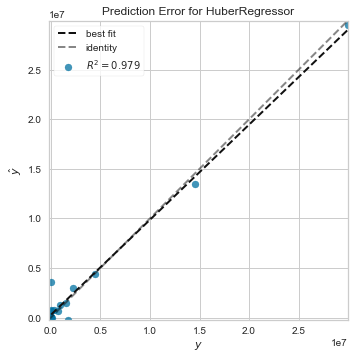

In [92]:
plot_model(tuned_huber, plot='error')

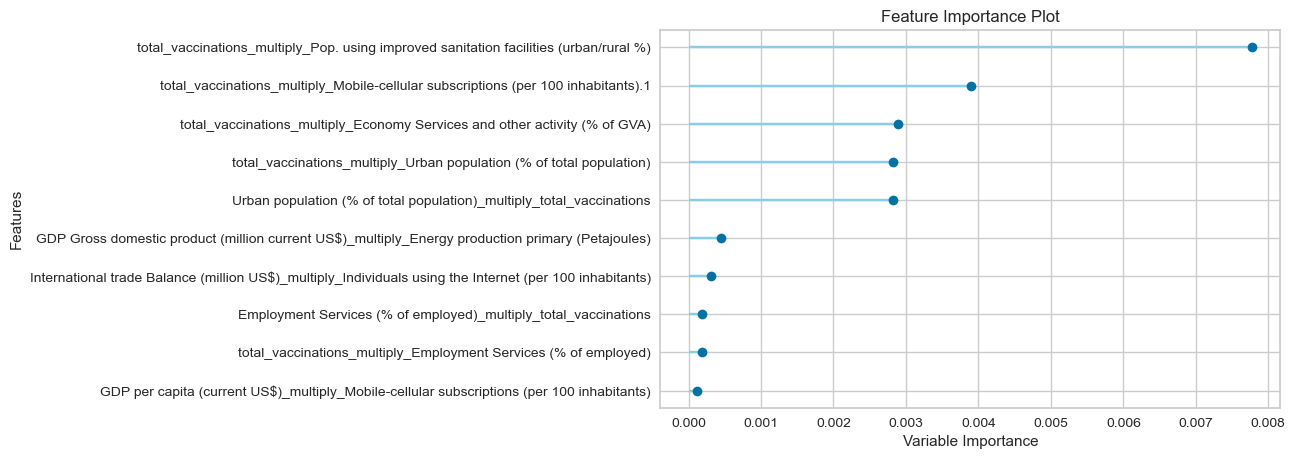

In [93]:
plot_model(tuned_huber, plot='feature')

As per huber model, new feature of total vaccinations multiply with the population using sanitation facilities is the most important feature in predicted the number of people vaccinated.

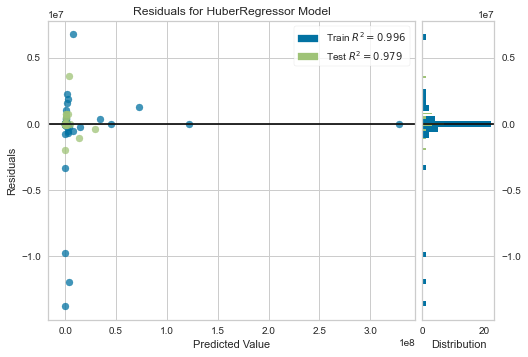

In [94]:
plot_model(tuned_huber, plot='residuals')

The model is neither underfitting or overfitting. Now let's try to find the models when country and vaccines are not included in the dataset

In [104]:
reg_experiment_1 = setup(CV_UNdata_heatmap_df, 
                       target = 'people_vaccinated', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='peoplevaccinated', remove_multicollinearity = True,
                      multicollinearity_threshold = 0.8, numeric_imputation = 'median', ignore_low_variance = True,
                      feature_selection=True, feature_interaction=True)

In [105]:
top3 = compare_models(n_select = 3)

In [106]:
xgboost = create_model('xgboost', cross_validation=True, fold = 10)

In [107]:
tune_xgboost = tune_model(xgboost, fold = 10)

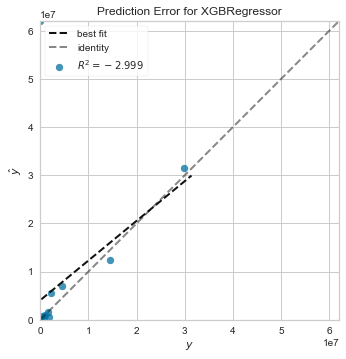

In [108]:
plot_model(tune_xgboost, plot='error')

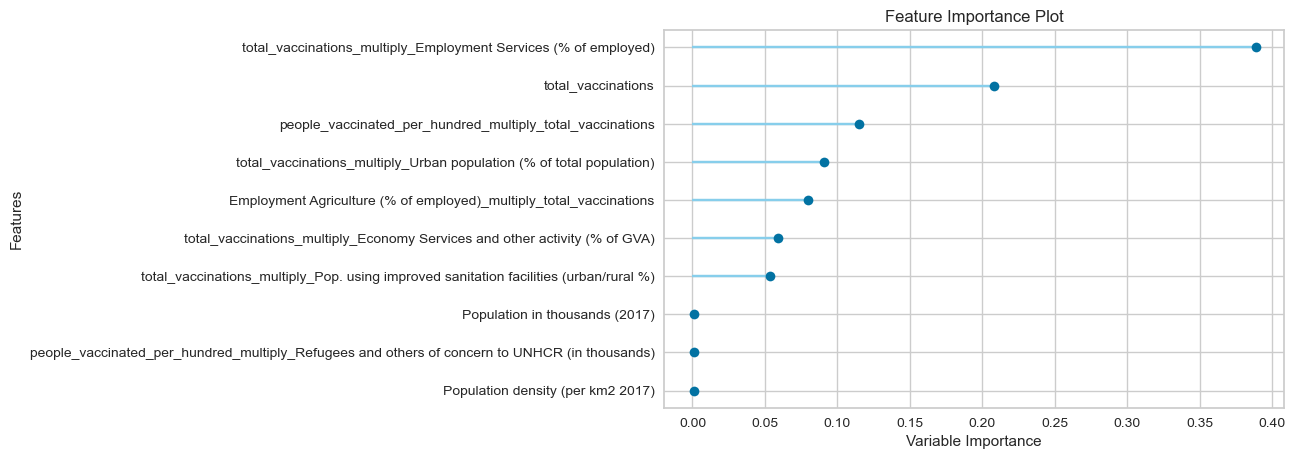

In [109]:
plot_model(tune_xgboost, plot='feature')

As per xgboost, total vaccinations multiply with employment services is the most important feature in predicting the people vaccinations.

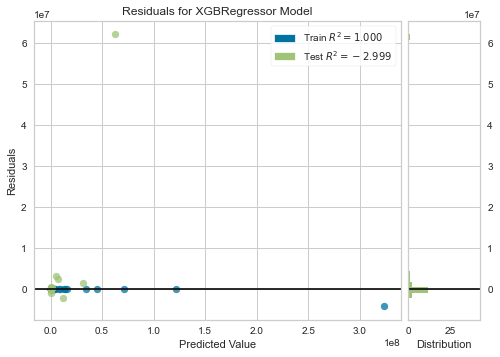

In [111]:
plot_model(tune_xgboost, plot='residuals')

The model is overfitted.

In [118]:
reg_experiment_vacc_per_hun = setup(CV_UNdata_df, 
                       target = 'people_vaccinated_per_hundred', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='peoplevaccinated', remove_multicollinearity = True,
                      multicollinearity_threshold = 0.8, numeric_imputation='median', feature_interaction=True, feature_selection=True)

In [119]:
get_config('X')

Individuals using the Internet (per 100 inhabitants)  \
0                                               135.0      
1                                               256.0      
2                                               118.0      
3                                                36.0      
4                                                37.0      
..                                                ...      
57                                               74.0      
58                                              388.0      
59                                               56.0      
60                                              102.0      
61                                              122.0      

    Sex ratio (m per 100 f 2017)  vaccines_Moderna  Surface area (km2)  \
0                     102.000000               0.0           2381741.0   
1                      95.900002               0.0           2780400.0   
2                      96.199997               0.0             83871.0   
3                     168.300003               0.0               771.0   
4                      97.300003               0.0             30528.0   
..                           ...               ...                 ...   
57                     98.199997               0.0             41291.0   
58                     97.000000               0.0            783562.0   
59                    262.399994               0.0             83600.0   
60                     97.400002               0.0            242495.0   
61                     97.199997               0.0             88499.0   

    people_fully_vaccinated  Urban population (% of total population)  \
0                       0.0                                 70.699997   
1                  520621.0                                 91.800003   
2                   89823.0                                 66.000000   
3                       0.0                                 88.800003   
4                   73785.0                                 97.900002   
..                      ...                                       ...   
57                      0.0                                 73.900002   
58                      0.0                                 73.400002   
59                5750000.0                                 85.500000   
60               10108228.0                                 82.599998   
61               49123912.0                                 73.900002   

    Net Official Development Assist. received (% of GNI)_-99.0  \
0                                                 1.0            
1                                                 1.0            
2                                                 1.0            
3                                                 1.0            
4                                                 1.0            
..                                                ...            
57                                                1.0            
58                                                1.0            
59                                                1.0            
60                                                1.0            
61                                                0.0            

    vaccines_Moderna Pfizer/BioNTech  Population density (per km2 2017)  \
0                                0.0                          17.299999   
1                                0.0                          16.200001   
2                                0.0                         106.000000   
3                                0.0                        1963.900024   
4                                1.0                         377.500000   
..                               ...                                ...   
57                               1.0                         214.500000   
58                               0.0                         104.900002   
59                               0.0             

In [120]:
top3_1 = compare_models(n_select = 3)

In [121]:
llar= create_model('llar', cross_validation=True, fold = 10)

In [123]:
tuned_llar = tune_model(llar, fold=5)

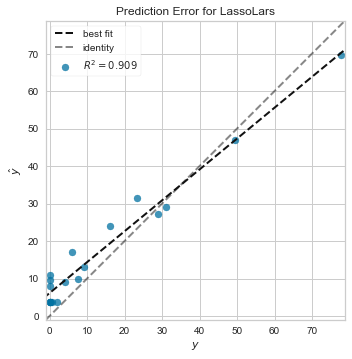

In [124]:
plot_model(tuned_llar, plot='error')

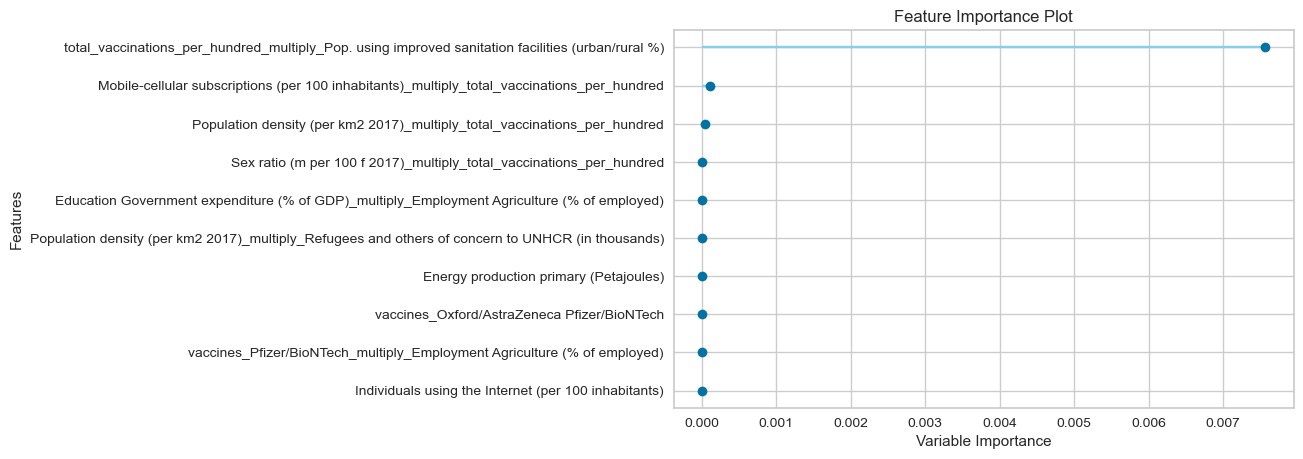

In [125]:
plot_model(tuned_llar, plot='feature')

As per llar model, As per huber model, new feature of total vaccinations per hundred multiply with the population using sanitation facilities is the most important feature in predicted the number of people vaccinated. The

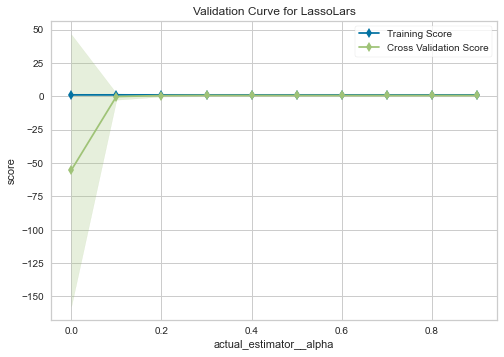

In [126]:
plot_model(tuned_llar, plot='vc')

In [129]:
X = CV_UNdata_df.drop(['people_vaccinated_per_hundred'], axis = 1)
Y = CV_UNdata_df['people_vaccinated_per_hundred']

In [130]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [132]:
final_llar = finalize_model(tuned_llar)

In [133]:
new_predictions = predict_model(tuned_llar, data=X_test)
new_predictions.head()

vaccines  total_vaccinations  people_vaccinated  \
24  Moderna, Pfizer/BioNTech             41822.0            31735.0   
39  Moderna, Pfizer/BioNTech            929398.0                0.0   
15  Moderna, Pfizer/BioNTech           4957142.0          4503079.0   
31           Pfizer/BioNTech              2500.0                0.0   
43           Pfizer/BioNTech             19829.0                0.0   

    people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
24                  10087.0                     0.0              8016.0   
39                      0.0                 41000.0            182970.0   
15                 454063.0                263384.0            246626.0   
31                      0.0                     0.0                 0.0   
43                      0.0                  6420.0              5746.0   

    total_vaccinations_per_hundred  people_fully_vaccinated_per_hundred  \
24                           12.26                                 2.95   
39                            5.44                                 0.00   
15                           85.59                                 7.85   
31                            0.06                                 0.00   
43                            0.46                                 0.00   

    daily_vaccinations_per_million  Surface area (km2)  ...  \
24                         23497.0            103000.0  ...   
39                         10678.0             41542.0  ...   
15                         42581.0             42921.0  ...   
31                             0.0             17818.0  ...   
43                          1332.0             75320.0  ...   

    Seats held by women in national parliaments %  \
24                                           47.6   
39                                           38.0   
15                                           37.4   
31                                            3.1   
43                                           18.3   

    Mobile-cellular subscriptions (per 100 inhabitants)  \
24                                              114.0     
39                                              123.5     
15                                              128.3     
31                                              231.8     
43                                              174.2     

    Mobile-cellular subscriptions (per 100 inhabitants).1  \
24                                               98.2       
39                                               93.1       
15                                               96.3       
31                                               82.1       
43                                               51.2       

    Individuals using the Internet (per 100 inhabitants)  \
24                                               27.0      
39                                               40.0      
15                                               47.0      
31                                               49.0      
43                                              383.0      

    Threatened species (number)  \
24                          0.5   
39                         11.1   
15                         14.4   
31                          0.4   
43                         62.3   

    CO2 emission estimates (million tons/tons per capita)  \
24                                              284.0       
39                                             2447.0       
15                                              666.0       
31                                             6941.0       
43                                               31.0       

    Energy production, primary (Petajoules)  \
24                                    952.0   
39                                    178.0   
15                                    119.0   
31                                    380.0   
43                                     35.0   

    Pop. using improved sanitation facilities (ur

In [134]:
print(tuned_llar)

LassoLars(alpha=1.0, copy_X=True, eps=0.02, fit_intercept=True, fit_path=True,
          jitter=None, max_iter=500, normalize=True, positive=False,
          precompute='auto', random_state=123, verbose=False)


In [135]:
save_model(tuned_llar, model_name = 'llar')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='people_vaccinated_per_hundred',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical...
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='people_vaccinated_per_hundred',
                              top_features_to_pick_percentage=None)),
                 ('pca', 'passthrough'),
                 ['trained_model',
              